# Machine learning with Scikit-learn

Scikit-learn is an open source machine learning library that supports supervised and unsupervised machine learning.

It also provides various tools for model fitting, data preprocessing, model selection, model evaluation, and many other utilities.

In this tutorial section, we will perform simple supervised machine learning tasks using scikit-learn:

* Inspecting dataset using pandas and seaborn packages
* Peform classification with algorithms like K-Nearest Neighbor, Perceptron and Support Vector Machine from the scikit-learn.
* Evaluate a machine learning model


# Working with the Penguin Dataset
The palmerpenguins data contains size measurements for three penguin species observed on three islands in the Palmer Archipelago, Antarctica.

We will use a subset of the original Penguin dataset. In this set, the physical attributes measured are bill length and flipper length of three Penguin species: Adelie, Chinstrap and Gentoo.

The subset (**penguins.csv**) can be downloaded from the following link:

[https://drive.google.com/file/d/1hEi1VYWNkE1F_DJP2oroafDSKWM-F6xB/view?usp=sharing](https://drive.google.com/file/d/1hEi1VYWNkE1F_DJP2oroafDSKWM-F6xB/view?usp=sharing)


## Data inspection
Data inspection is an important and necessary step in machine learning because it allows data scientists to understand the characteristics of their data and identify potential problems or issues with it.
By carefully inspecting the data, data scientists can ensure that the data is accurate, complete, and most importantly relevant to the problem they are trying to solve.
For our data inspection, we will be using the following packages:

1.   Pandas, which is a standard data analysis package
2.   Seaborn, which can help us create beautiful visualizations of our data

We can import the packages as follows:

In [34]:
! pip install pandas seaborn

In [35]:
import pandas as pd
import seaborn as sns

## Load the dataset
To load the data, we need to use the appropriate command depending on the type of data file we have.

For example, if we have a CSV file, we can load it using the `read_csv()` method from Pandas, like this:

In [36]:
data = pd.read_csv('penguins.csv')

## Basic info about data

To get basic information about the data, we can use the `info()` method from Pandas.

This will print out a range of information about the data, including the number of entries and columns, the data types of each column, and the number of non-null entries.

This information is useful for understanding the general structure of the data and for identifying potential issues or inconsistencies that need to be addressed. The following information is then shown:

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   bill_length_mm     342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
dtypes: float64(2), object(1)
memory usage: 8.2+ KB


### First look at data
To get a first look at the data, we can use the `head()` and `tail()` methods from Pandas.

Pandas `shape` property returns a tuple containing the number of rows and columns of the dataframe.

Or you can print the data to see an overview of your data.

Using Pandas `head()` method:

In [38]:
data.head()

,species,bill_length_mm,flipper_length_mm
0,Adelie,39.1,181.0
1,Adelie,39.5,186.0
2,Adelie,40.3,195.0
3,Adelie,NaN,NaN
4,Adelie,36.7,193.0


Using Pandas `tail()` method:

In [39]:
data.tail()

,species,bill_length_mm,flipper_length_mm
339,Gentoo,NaN,NaN
340,Gentoo,46.8,215.0
341,Gentoo,50.4,222.0
342,Gentoo,45.2,212.0
343,Gentoo,49.9,213.0


Pandas `shape` property returns a tuple containing the number of rows and columns of the dataframe:

In [40]:
data.shape

(344, 3)

Or we can print the dataframe to see an overview of the data:

In [41]:
print(data)

    species  bill_length_mm  flipper_length_mm
0    Adelie            39.1              181.0
1    Adelie            39.5              186.0
2    Adelie            40.3              195.0
3    Adelie             NaN                NaN
4    Adelie            36.7              193.0
..      ...             ...                ...
339  Gentoo             NaN                NaN
340  Gentoo            46.8              215.0
341  Gentoo            50.4              222.0
342  Gentoo            45.2              212.0
343  Gentoo            49.9              213.0

[344 rows x 3 columns]


To get a descriptive statistical overview of the data, we can use the `described()` method from Pandas, like this:

In [42]:
data.describe()

,bill_length_mm,flipper_length_mm
count,342.000000,342.000000
mean,43.921930,200.915205
std,5.459584,14.061714
min,32.100000,172.000000
25%,39.225000,190.000000
50%,44.450000,197.000000
75%,48.500000,213.000000
max,59.600000,231.000000


## Check for missing values and duplicate rows
We notice that there are some rows that don't have any value for `bill_length_mm` or `flipper_length_mm` columns.

To check if the data has any missing values, we can use the `isnull()` and `sum()` methods from Pandas, like this:

In [43]:
print(data.isnull().sum())

species              0
bill_length_mm       2
flipper_length_mm    2
dtype: int64


In general, we couldn't work with rows that have some missing values. So we will remove all missing-value rows using `dropna(ignore_index=True)` method:

In [44]:
data = data.dropna(ignore_index=True)
print(data)

    species  bill_length_mm  flipper_length_mm
0    Adelie            39.1              181.0
1    Adelie            39.5              186.0
2    Adelie            40.3              195.0
3    Adelie            36.7              193.0
4    Adelie            39.3              190.0
..      ...             ...                ...
337  Gentoo            47.2              214.0
338  Gentoo            46.8              215.0
339  Gentoo            50.4              222.0
340  Gentoo            45.2              212.0
341  Gentoo            49.9              213.0

[342 rows x 3 columns]


To check if there are duplicate entries in the data, we can use the `duplicated()` method from Pandas.

This will return a `True` value for each row that is a duplicate of another row, and a `False` value for each unique row.

If there are any duplicate entries in the data, we can remove them using the `drop_duplicates(ignore_index=True)` method.

In [45]:
print(data.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
337    False
338     True
339    False
340    False
341    False
Length: 342, dtype: bool


## Short introduction to data visualization
Data visualization can be a powerful tool for inspecting data and identifying patterns, trends, and anomalies.

It allows you to quickly and easily explore the data, and get insights that might not be immediately obvious when looking at the raw data.

In this section, we will work with the histogram and scatterplot.

### Histogram

Histograms are a type of graphical representation that shows the distribution of a dataset.

They are particularly useful for understanding the shape of a distribution and identifying patterns, trends, and anomalies in the data.

In the following, we will plot a histogram to compare the number of penguins in each species using Seaborn `histplot()` method:

<Axes: xlabel='species', ylabel='Count'>

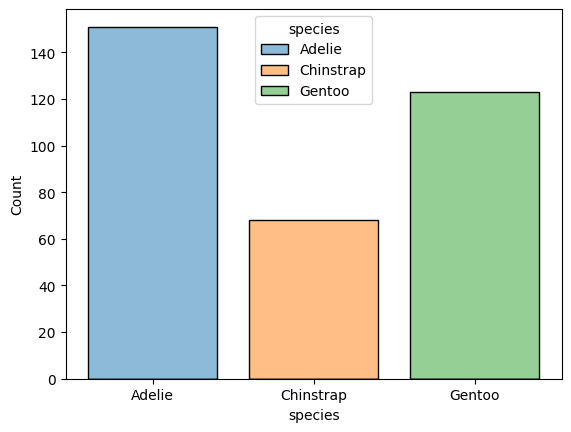

In [46]:
sns.histplot(data=data, x="species", hue="species", shrink=0.8)

### Scatterplot

A scatter plot (aka scatter chart, scatter graph) uses dots to represent values for two different numeric variables.

The position of each dot on the horizontal and vertical axis indicates values for an individual data point.

Scatter plots are used to observe relationships between variables.

In the following, In the following, we will create a scatter plot to observe the relationships between bill length and flipper length of penguins in each species using Seaborn `scatterplot()` method.

The scatter plot suggests that we can use bill length and flipper length together to classify a penguin into its species.

<Axes: xlabel='flipper_length_mm', ylabel='bill_length_mm'>

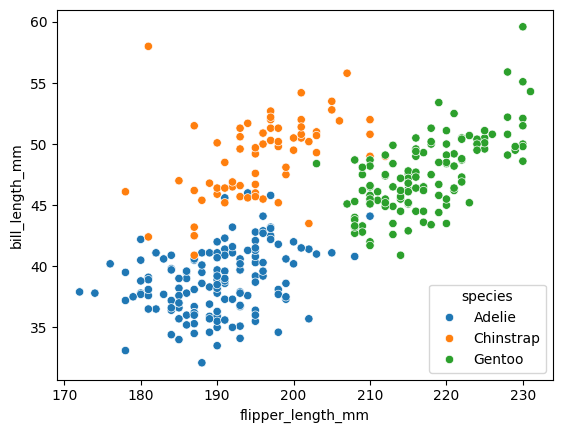

In [47]:
sns.scatterplot(data=data, x="flipper_length_mm", y="bill_length_mm", hue="species")

# Working with scikit-learn
In this section, we will discuss how to utilize the scikit-learn package to perform a classification task.

Based on the scatter plot above, it appears that bill length and flipper length can help classify a penguin into its respective species.

We will begin with data preparation:

## Data preparation
We will create `evidence` and `labels` lists:
*   `evidence` should be a list of all of the evidence for each of the data points
*   `labels` should be a list of all of the labels for each data point

The `evidence` contains bill and flipper length. The values are extracted from the columns `bill_length_mm` and `flipper_length_mm` from the `data` Dataframe.

The `labels` contains the values of the column `species` from the `data` Dataframe.

The `to_numpy()` could be used to convert a dataframe to a numpy array.

In [48]:
print(data)

    species  bill_length_mm  flipper_length_mm
0    Adelie            39.1              181.0
1    Adelie            39.5              186.0
2    Adelie            40.3              195.0
3    Adelie            36.7              193.0
4    Adelie            39.3              190.0
..      ...             ...                ...
337  Gentoo            47.2              214.0
338  Gentoo            46.8              215.0
339  Gentoo            50.4              222.0
340  Gentoo            45.2              212.0
341  Gentoo            49.9              213.0

[342 rows x 3 columns]


In [49]:
evidence = data[['bill_length_mm','flipper_length_mm']].to_numpy()
print(evidence.shape)

(342, 2)


In [50]:
labels = data['species'].to_numpy()
print(labels.shape)

(342,)


## Train Test Splitting
We have divided our data into `evidence` (`features` or X) and `labels` (`targets` or y).

Now we continue dividing the data into `X_train`, `X_test`, `y_train` and `y_test`.

The `X_train` and `y_train` sets are used for training and fitting the model.

The `X_test` and `y_test` sets are used for testing the model if it’s predicting the right outputs/labels.

The `train_test_split()` method is used to split our data into the train and test sets.

The data will be shuffled by default before splitting. We can explicitly test the size of the train and test sets. It is suggested to keep our train sets larger than the test sets.


In [51]:
! pip install scikit-learn

In [52]:
from sklearn.model_selection import train_test_split
X_training, X_testing, y_training, y_testing = train_test_split(evidence, labels, test_size=0.25)

print(f'Training set: {X_training.shape} - {y_training.shape}')
print(f'Testing set: {X_testing.shape} - {y_testing.shape}')


Training set: (256, 2) - (256,)
Testing set: (86, 2) - (86,)


# K-Nearest Neighbors Classification
K-nearest neighbors (KNN) algorithm is a type of supervised machine learning algorithm which can be used for both classification as well as regression predictive problems. However, it is mainly used for classification predictive problems in industry.

KNN has two important properties:
* KNN is a lazy learning algorithm because it does not have a specialized training phase and uses all the data for training while classification.
* KNN is also a non-parametric learning algorithm because it doesn’t assume anything about the underlying data.





## Working with KNN model
To define a KNN model, we can use the class KNeighborsClassifier from scikit-learn package.

In [53]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

To train the model, we can use `fit()` method:

In [54]:
# Fit model
model.fit(X_training, y_training)

,n_neighbors,1
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


To make prediction using the trained model, we can use `predict()` method:

In [55]:
# Make predictions on the testing set
predictions = model.predict(X_testing)

# Print the first 10 predictions
for i in range(10):
  print(f'{X_testing[i]} --> {predictions[i]} | {y_testing[i]}')

[ 38.8 190. ] --> Adelie | Adelie
[ 41.1 188. ] --> Adelie | Adelie
[ 42.1 195. ] --> Adelie | Adelie
[ 36.2 187. ] --> Adelie | Adelie
[ 45.2 191. ] --> Adelie | Chinstrap
[ 41.4 191. ] --> Adelie | Adelie
[ 50.8 210. ] --> Chinstrap | Chinstrap
[ 40.6 183. ] --> Adelie | Adelie
[ 40.7 190. ] --> Adelie | Adelie
[ 45.1 207. ] --> Gentoo | Gentoo


# Evaluating a model

## Accuracy rate
Accuracy rate is a simple metric to evaluate a classification model.
It is defined as the percentage of correct predictions for the test data.

The following code compute the accuracy rate of the KNN model:

In [56]:
# Compute how well we performed
correct = (y_testing == predictions).sum()
incorrect = (y_testing != predictions).sum()
total = len(predictions)

# Print results
print(f"Results for model {type(model).__name__}")
print(f"Correct: {correct}")
print(f"Incorrect: {incorrect}")
print(f"Accuracy: {100 * correct / total:.2f}%")

Results for model KNeighborsClassifier
Correct: 80
Incorrect: 6
Accuracy: 93.02%


## Confusion matrix
When performing classification predictions, there's four types of outcomes that could occur.

* True positives (TP): are when you predict an observation belongs to a class and it actually does belong to that class.
* True negatives (TN): are when you predict an observation does not belong to a class and it actually does not belong to that class.
* False positives (FP): occur when you predict an observation belongs to a class when in reality it does not.
* False negatives (FN): occur when you predict an observation does not belong to a class when in fact it does.

These four outcomes are often plotted on a confusion matrix.

The following confusion matrix is an example for the case of binary classification. You would generate this matrix after making predictions on your test data and then identifying each prediction as one of the four possible outcomes described above.

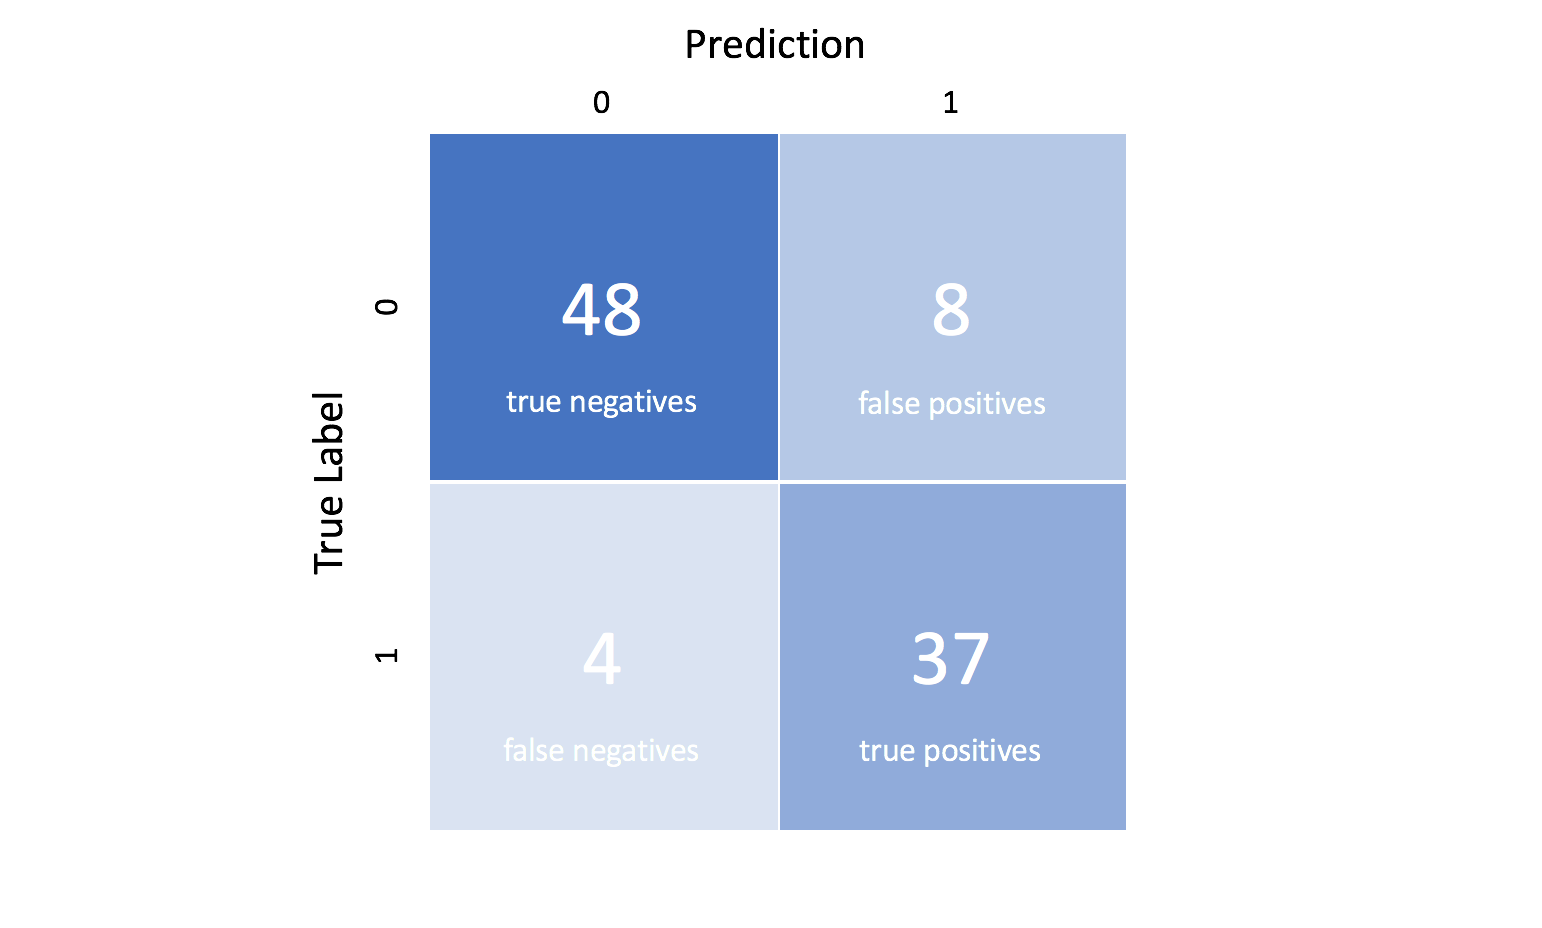

You can also extend this confusion matrix to plot multi-class classification predictions.

The following is an example confusion matrix for our penguin classifying model.

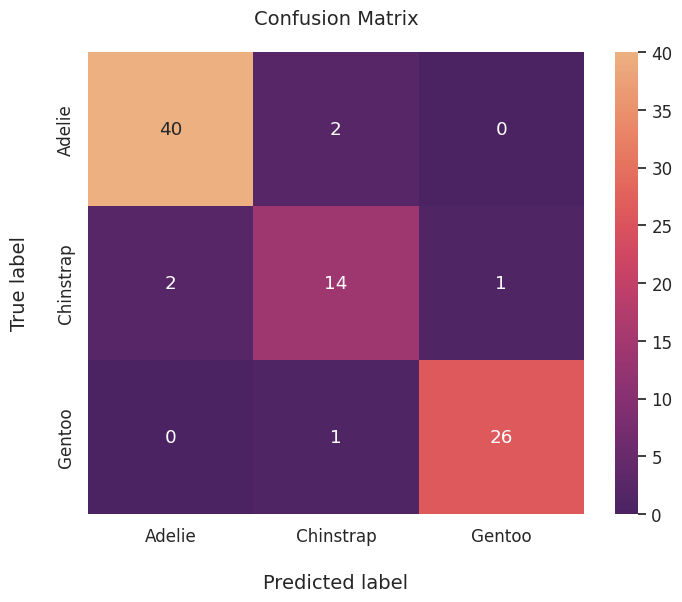

In [57]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_testing, predictions, labels=model.classes_)

# Change figure size and increase dpi for better resolution
plt.figure(figsize=(8,6), dpi=100)

# Scale up the size of all text
sns.set(font_scale = 1.1)

# Plot Confusion Matrix using Seaborn heatmap()
# Parameters:
# first param - confusion matrix in array format
# annot = True: show the numbers in each heatmap cell
# fmt = 'd': show numbers as integers.
# cmap - set colormap

ax = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='flare_r')

# set x-axis label and ticks.
ax.set_xlabel("Predicted label", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(model.classes_)

# set y-axis label and ticks
ax.set_ylabel("True label", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(model.classes_)

# set plot title
ax.set_title("Confusion Matrix", fontsize=14, pad=20)

plt.show()

## Three main metrics
The three main metrics used to evaluate a classification model are accuracy, precision, and recall.
1. **Accuracy**

It is defined as the percentage of correct predictions for the test data. It can be calculated easily by dividing the number of correct predictions by the number of total predictions.

\begin{align}
accuracy = \frac{TP + TN}{TP + TN + FP + FN}
\end{align}


2. **Precision**

It is defined as the fraction of relevant examples (true positives) among all of the examples which were predicted to belong in a certain class.

\begin{align}
precision = \frac{TP}{TP + FP}
\end{align}

3. **Recall**

It is defined as the fraction of examples which were predicted to belong to a class with respect to all of the examples that truly belong in the class.

\begin{align}
recall = \frac{TP}{TP + FN}
\end{align}



# Exercises

In the exercises, we are working with the counterfeit banknotes dataset. The dataset contains data extracted from images of both genuine and forged banknote-like specimens.

For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels.

Due to the object lens and distance to the investigated object grey-scale pictures with a resolution of about 660 dpi were gained.

Wavelet Transform tool was used to extract features from images. The features are:
* variance: Variance of Wavelet Transformed Image
* skewness: Skewness of Wavelet Transformed Image
* curtosis: Curtosis of Wavelet Transformed Image
* entropy: Entropy of Image
* class: Class (1: genuine, 0: forged)

The dataset can be downloaded from the following link:


https://drive.google.com/file/d/1vZl5eLTObn2RmtpYFtBgPpEhUhUMFAxS/view?usp=share_link




## Exercise 1: Working with counterfeit banknotes dataset

Perform basic data inspection on the banknotes dataset such as:
* Load dataset into a Pandas dataframe
* Display basic infor about data
* Check for missing values and duplicated rows. Delete all rows that have some missing values or duplicated
* Simple data visualization using histogram and scatterplot


## Exercise 2: Implement KNN from scratch

In the tutorial, we used KKN model from scikit-learn package. In this exercise, you are asked to implement K-Nearest Neighbors from scratch.

Develope a K-Nearest Neighbors algorithm that can work with the banknotes dataset and use the developed algorithm to classify whether a banknote is genuine or counterfeit.

## Exercise 3: Classification using Perceptron and SVM

Using scikit-learn package to complete banknote classification task using Perceptron algorithm and then Support vector machine (SVM) algorithm.

You should perform the following tasks:
* Data preparation
* Train Test Splitting
* Define a model (with Perceptron algorithm and SVM algorithm)
* Train the model
* Make prediction using the trained models
* Compare the classification results of the two models in terms of accuracy and confusion matrix.